<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Texas law enforcement population
---

## Overview

A high-level look at the population of sworn officers in Texas law enforcement.

## Summary of findings
* There are about 75,000 sworn police officers in Texas.
* About 60% are white, 30% hispanic, 10% black.
* About 90% are men.
* While women are only 10% of officers at large, they comprise ~15% of younger officers, ~20% of black officers, and ~15% of hispanic officers.
* High-population counties have disproportionately many minority officers (especially black -- but also hispanic, female, and other non-white races).
* Newer cohorts of officers are more racially and gender diverse than older active cohorts.

## Datasets used:
* `tji/auxiliary-datasets/list_of_texas_officers`
* `tji/auxiliary-datasets/census_data_by_county`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2018-05-31 20:05:21 PDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
Git hash: c304f867152cb4001ae28bb830598e281928ba1e
watermark 1.5.0


Removing 0 past plots


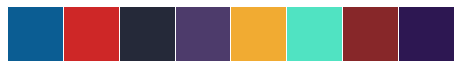

In [2]:
from lib.utils import *
from lib.style import *

plotsaver = PlotSaver('../plots/', 'officer_population_', numbering=False)
sns.palplot(sns.color_palette())

In [3]:
def long_gender(g):
    if pd.isnull(g):
        return g
    return 'MALE' if g == 'M' else 'FEMALE'

### Load and merge data

In [4]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
officer_info = dataset.dataframes['list_of_texas_officers']
officer_info['gender'] = officer_info['gender'].apply(long_gender)
officer_info['highest_cert_abbr'] = officer_info['highest_cert'].apply(lambda cert: cert.split(' PEACE OFFICER')[0])
officer_info['service_years_int_capped'] = officer_info.service_time.astype(int).apply(lambda y: min(y, 50))

In [5]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
census = dataset.dataframes['census_data_by_county']
county_populations = census[census['metric_description'] == 'Population estimates, July 1, 2016,  (V2016)'].iloc[0]
county_populations.drop([c for c in county_populations.index if c.startswith('metric')], inplace=True)
county_populations = dict((c.upper(), count) for c, count in county_populations.astype(int).items())

## [ Helper code for county population analyses ]

In [6]:
def pop_category(p):
    if pd.isnull(p):
        return p
    elif p < 1e4:
        return 'XSMALL\n(< 10k)'
    elif p < 1e5:
        return 'SMALL\n(< 100k)'
    elif p < 1e6:
        return 'MEDIUM\n(100k-1MM)'
    else:
        return 'LARGE\n(1MM+)'

officer_info['county_size'] = officer_info.current_agency_county.apply(
    lambda c: pop_category(county_populations.get(c, None)))

officer_info.sample(10)

,name_full,name_first,name_middle,name_last,name_suffix,gender,race,age_range,current_agency,current_agency_county,highest_cert,highest_cert_int,service_time,highest_cert_abbr,service_years_int_capped,county_size
39882,PABLO MARTINEZ,PABLO,NaN,MARTINEZ,NaN,MALE,HISPANIC,41-50,LONE STAR COLLEGE SYSTEM POLICE DEPT,HARRIS,MASTER PEACE OFFICER,4,25.42,MASTER,25,LARGE\n(1MM+)
46750,JEFFREY L WENDLING,JEFFREY,L,WENDLING,NaN,MALE,WHITE,51+,INGRAM POLICE DEPT,KERR,MASTER PEACE OFFICER,4,46.67,MASTER,46,SMALL\n(< 100k)
71399,ANTHONY A CAMPANA,ANTHONY,A,CAMPANA,NaN,MALE,WHITE,31-40,PFLUGERVILLE POLICE DEPT,TRAVIS,ADVANCED PEACE OFFICER,3,9.42,ADVANCED,9,LARGE\n(1MM+)
59363,MICHAEL J MARQUEZ,MICHAEL,J,MARQUEZ,NaN,MALE,HISPANIC,51+,FORT WORTH POLICE DEPT,TARRANT,ADVANCED PEACE OFFICER,3,10.75,ADVANCED,10,LARGE\n(1MM+)
65188,JOHN H MURPHY,JOHN,H,MURPHY,NaN,MALE,WHITE,51+,TEXAS DEPT OF PUBLIC SAFETY,TEXAS,MASTER PEACE OFFICER,4,29.25,MASTER,29,None
13833,JOSEPH R HANNIGAN,JOSEPH,R,HANNIGAN,NaN,MALE,WHITE,51+,DALLAS CO COMM COLLEGE DIST POLICE DEPT,DALLAS,MASTER PEACE OFFICER,4,14.75,MASTER,14,LARGE\n(1MM+)
4257,STEVEN E LISHERNESS,STEVEN,E,LISHERNESS,NaN,MALE,WHITE,41-50,SAN ANTONIO PARK POLICE,BEXAR,MASTER PEACE OFFICER,4,19.25,MASTER,19,LARGE\n(1MM+)
26266,JAMES A POPE,JAMES,A,POPE,NaN,MALE,WHITE,51+,GALVESTON CITY MARSHALS OFFICE,GALVESTON,MASTER PEACE OFFICER,4,36.41,MASTER,36,MEDIUM\n(100k-1MM)
21073,CHRISTOPHER D LOUGHRY,CHRISTOPHER,D,LOUGHRY,NaN,MALE,WHITE,31-40,LEWISVILLE POLICE DEPT,DENTON,INTERMEDIATE PEACE OFFICER,2,4.58,INTERMEDIATE,4,MEDIUM\n(100k-1MM)
74780,DAVID F BALDERAS,DAVID,F,BALDERAS,NaN,MALE,HISPANIC,51+,LAREDO POLICE DEPT,WEBB,MASTER PEACE OFFICER,4,27.42,MASTER,27,MEDIUM\n(100k-1MM)


## [ A battery of descriptive plots ]

In [7]:
plot_order = ['age_range', 'race', 'gender', 'service_years_int_capped', 'county_size', 'highest_cert_abbr']
col_colors = {
    'gender': [TJI_RED, TJI_BLUE],
    'race': [TJI_DEEPBLUE, TJI_RED, TJI_BLUE, TJI_YELLOW],
    'age_range': sns.color_palette('Blues_d', 4)[::-1],
    'county_size': sns.color_palette('Greens_d', 4)[::-1],
    'service_years_int_capped': [TJI_BLUE],
    'highest_cert_abbr': sns.color_palette()[:-1],
}
order = {
    'gender': ['FEMALE', 'MALE'],
    'race': ['WHITE', 'HISPANIC', 'BLACK', 'OTHER'],
    'age_range': ['21-30', '31-40', '41-50', '51+'],
    'county_size': ['XSMALL\n(< 10k)', 'SMALL\n(< 100k)', 'MEDIUM\n(100k-1MM)', 'LARGE\n(1MM+)'],
    'highest_cert_abbr': ['NONE', 'BASIC', 'INTERMEDIATE', 'ADVANCED', 'MASTER'],
}
col_printname = {
    'gender': 'Gender',
    'race': 'Race',
    'age_range': 'Age',
    'county_size': 'County Size',
    'service_years_int_capped': 'Service Time (years)',
    'highest_cert_abbr': 'Certification Level',
}

In [8]:
def make_grid_plot(stack_col=None, alpha=0.8): 
    nrows = 3#2 if stack_col else 3
    fig, axes = plt.subplots(nrows, 2)
    axes = axes.flatten()

    fig.set_size_inches(18, 6 * nrows)
    if not stack_col:
        fig.suptitle("OVERVIEW - %s Texas police officers, as of May 2018" % "{:,}".format(len(officer_info)), fontsize=24)
    else:
        fig.suptitle("CROSSTAB - Texas officer demographics by " + col_printname[stack_col], fontsize=24)

    iax = 0
    for by_col in plot_order:
        if by_col == stack_col:
            continue
        ax = axes[iax]
        iax += 1
        if stack_col:
            vc = officer_info.groupby([by_col, stack_col]).size().unstack()
            vc = vc.div(vc.sum(axis=1), axis=0)
            vc = vc[order[stack_col]]
            color = col_colors[stack_col]
        else:
            vc = officer_info[by_col].value_counts(True)
            color = col_colors[by_col][::-1]

        if by_col == 'service_years_int_capped':
            vc = vc.sort_index()
            vc.plot(kind='bar', ax=ax, width=1, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_ylim(0, 1.01)
                ax.set_yticks(np.arange(0, 1.01, .1))
            ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                                for t in ax.get_xticklabels()], rotation=0)
            ax.set_ylabel("Fraction of officers")
            ax.set_xlabel(col_printname[by_col])
            percentify_y(ax, decimals=0)
        else:
            vc = vc.loc[order[by_col]][::-1]
            vc.plot(kind='barh', ax=ax, width=.9, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_xlim(0, 1.01)
                ax.set_xticks(np.arange(0, 1.01, .1))
            ax.set_xlabel("Fraction of officers")
            ax.set_ylabel(col_printname[by_col])
            percentify_x(ax, decimals=0)

        if stack_col:
            ax.set_title("%s distribution by %s" % (col_printname[stack_col], col_printname[by_col]))
            ax.legend()
        else:
            ax.set_title("By %s" % (col_printname[by_col]))
        plt.subplots_adjust(hspace=0.4, wspace=0.4, left=0.16)

    plotsaver.saveplot(fig, (stack_col or 'overview') + '_grid')
    return fig, ax

Saving plot to ../plots/officer_population_overview_grid.png
Saving plot to ../plots/officer_population_age_range_grid.png
Saving plot to ../plots/officer_population_race_grid.png
Saving plot to ../plots/officer_population_gender_grid.png
Saving plot to ../plots/officer_population_county_size_grid.png
Saving plot to ../plots/officer_population_highest_cert_abbr_grid.png


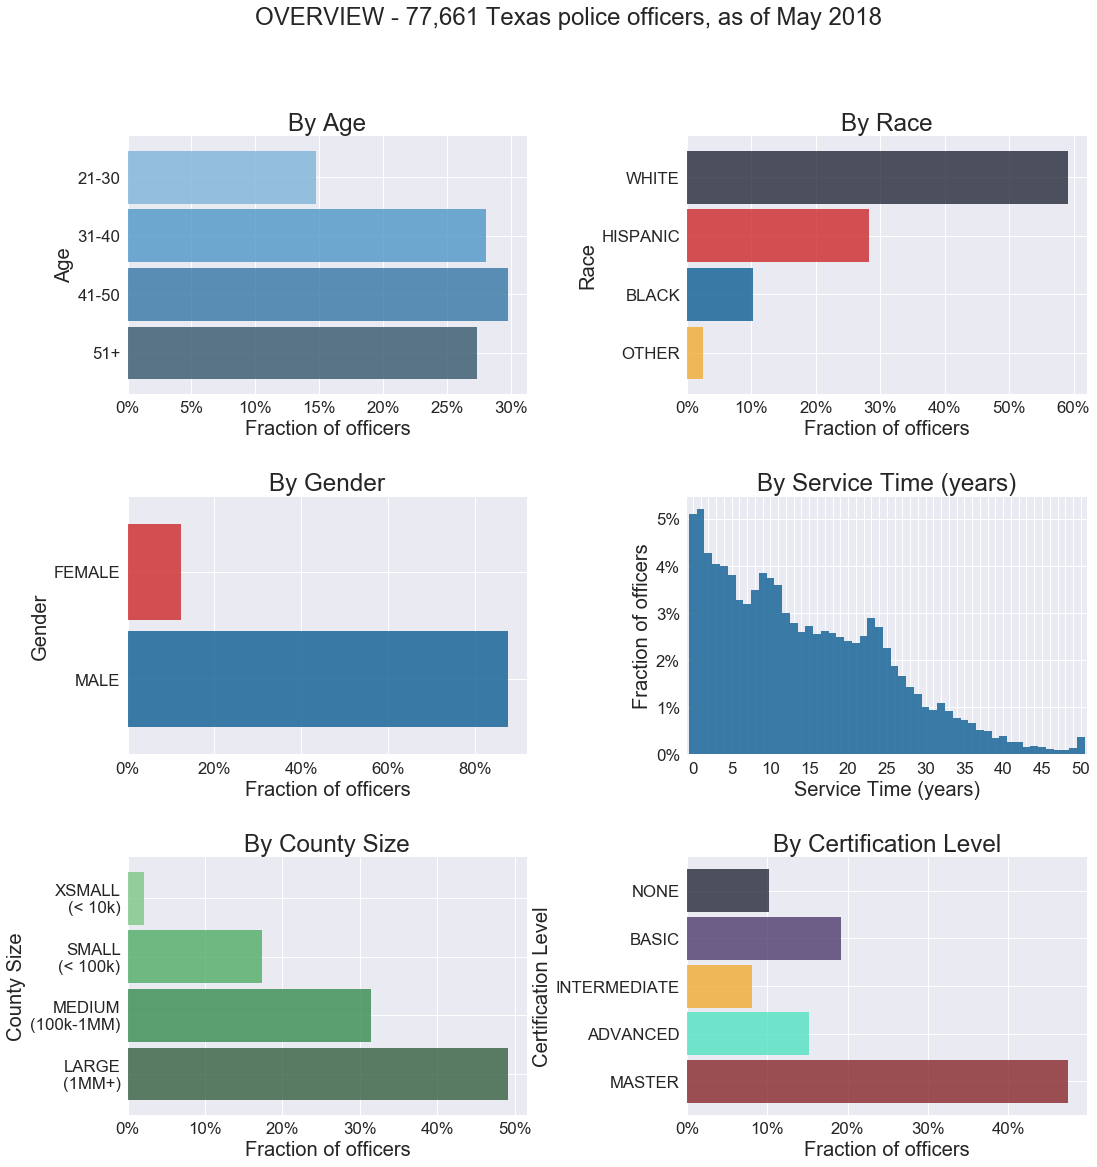

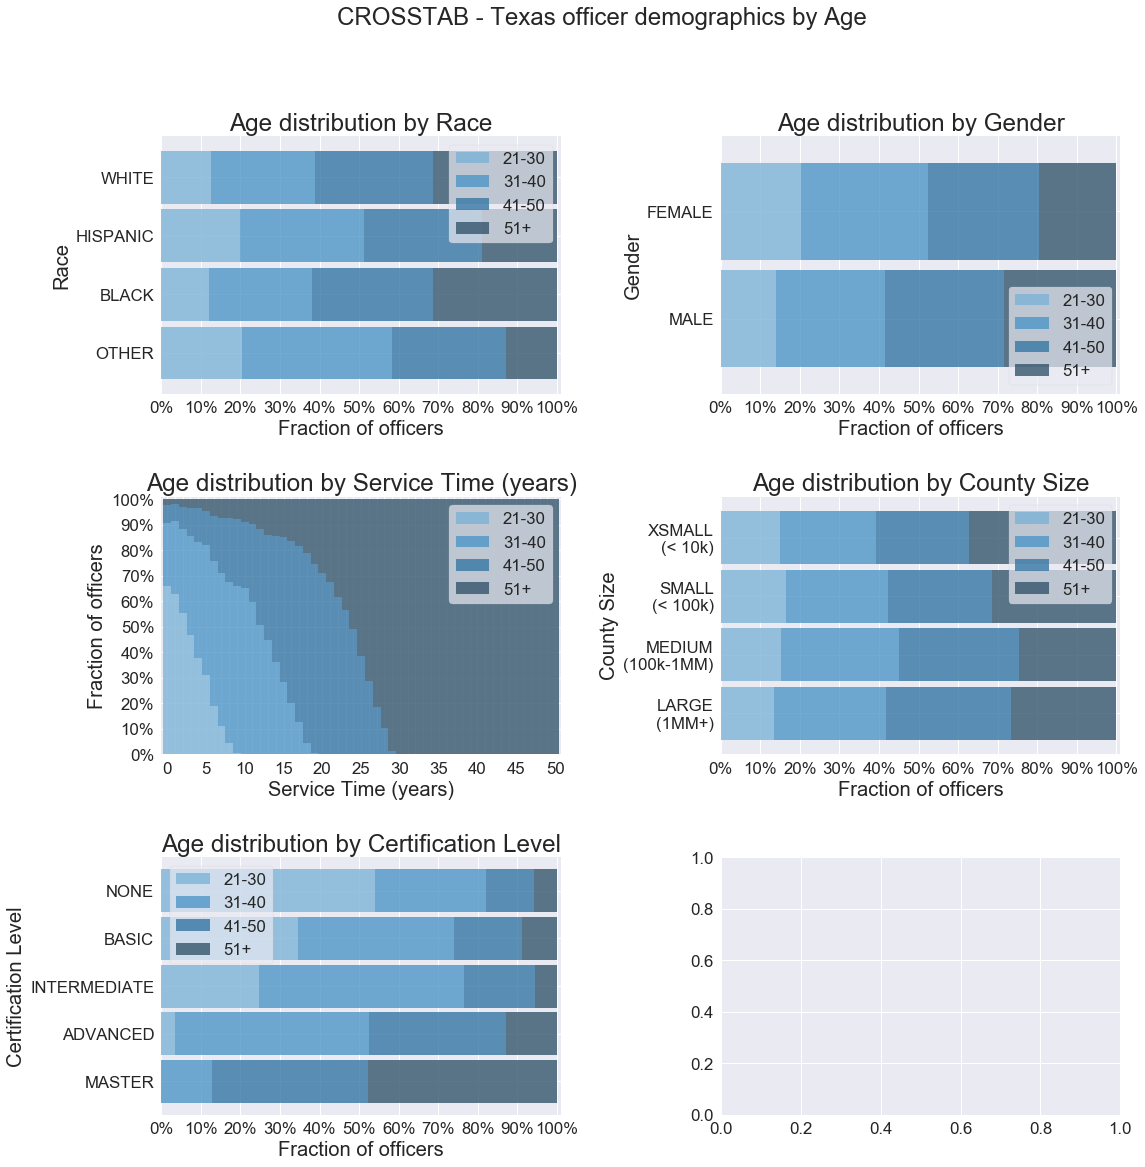

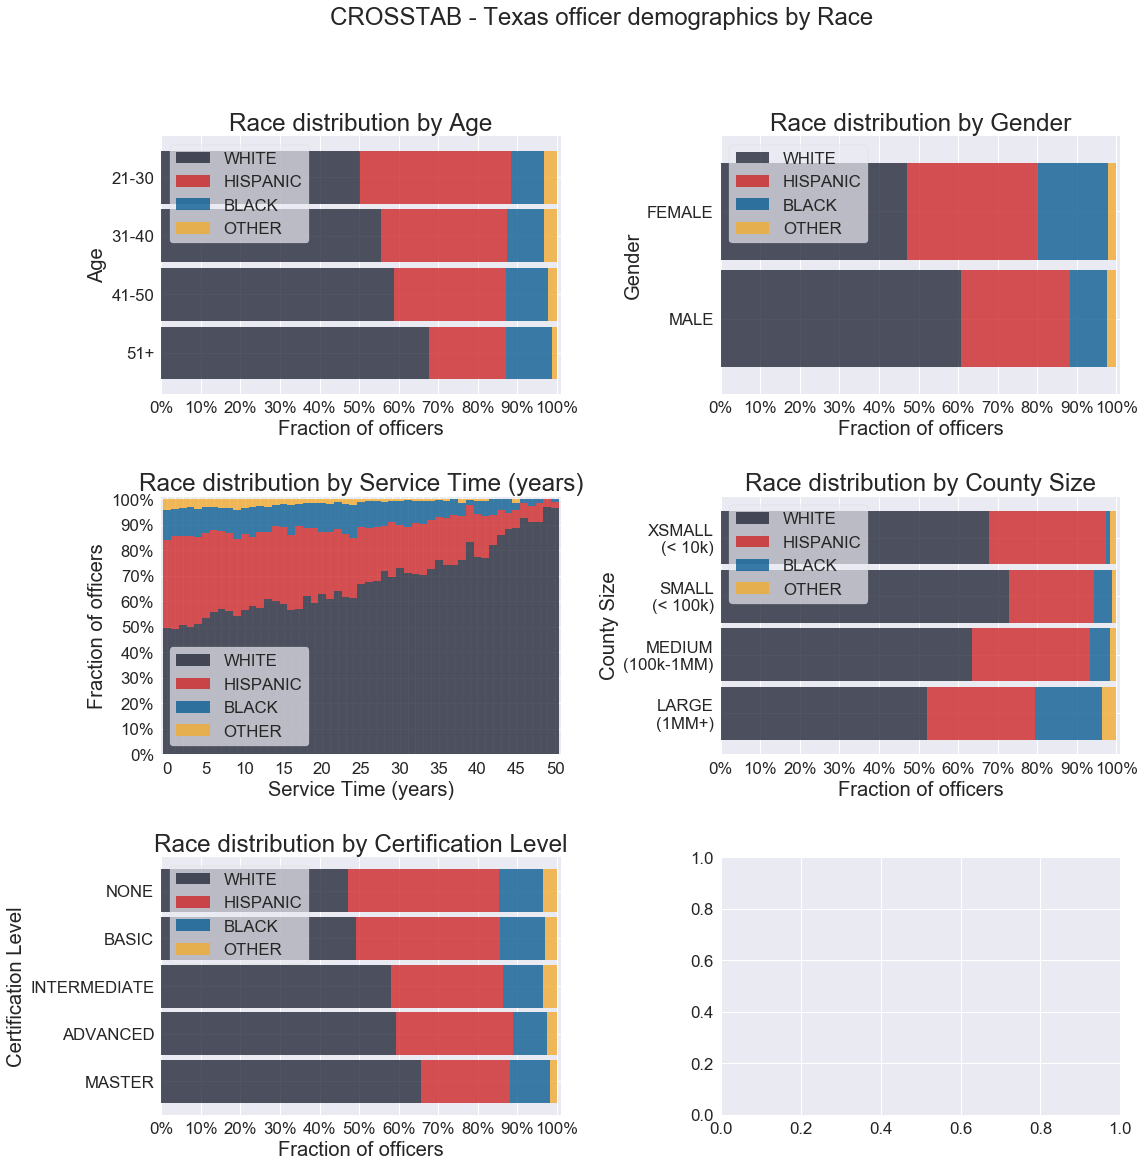

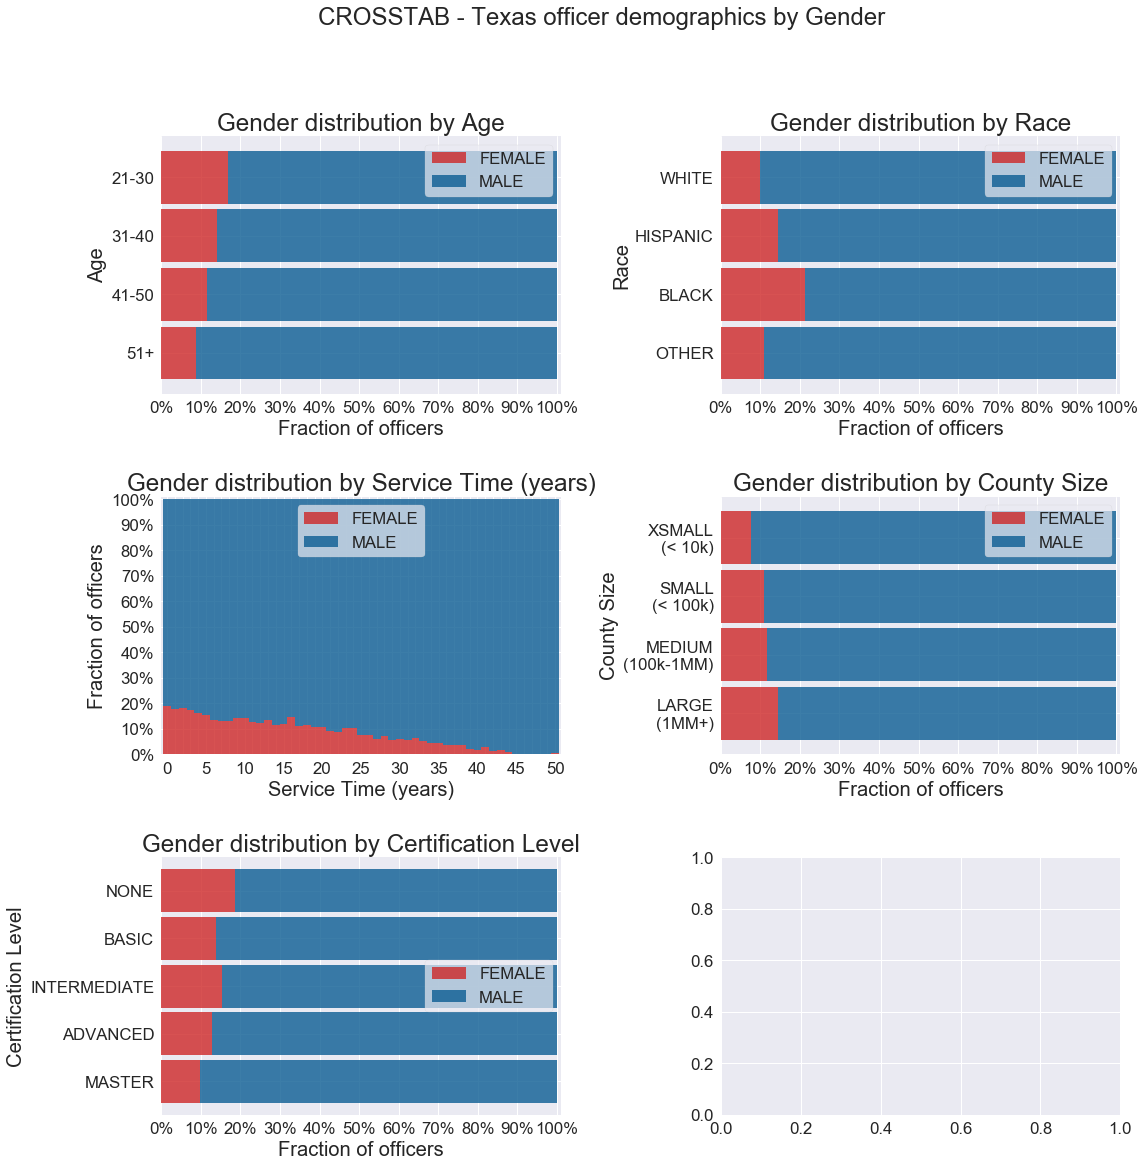

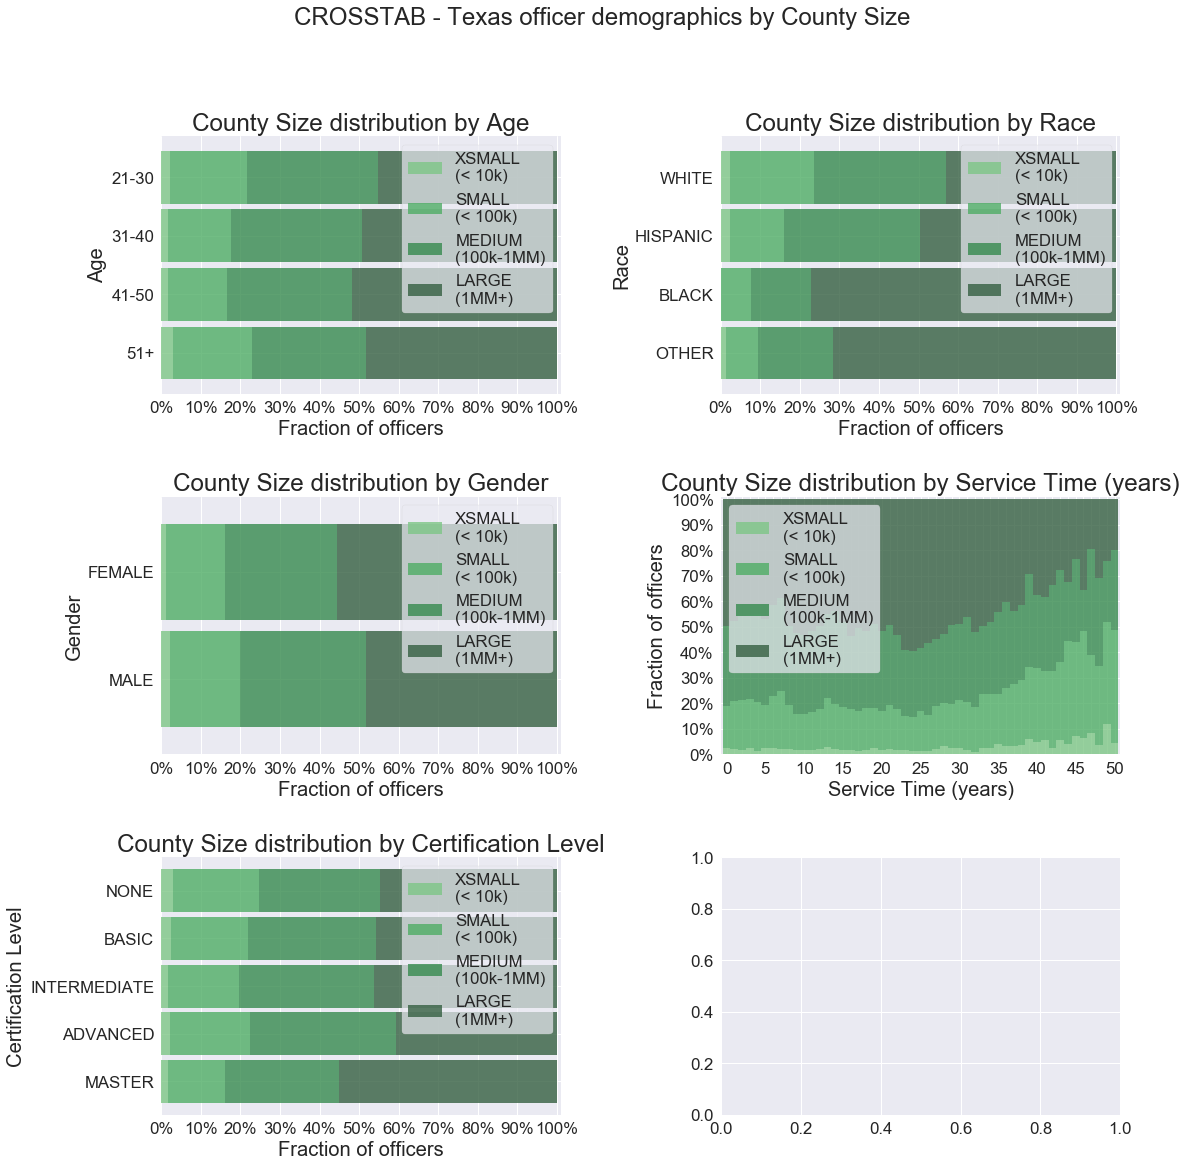

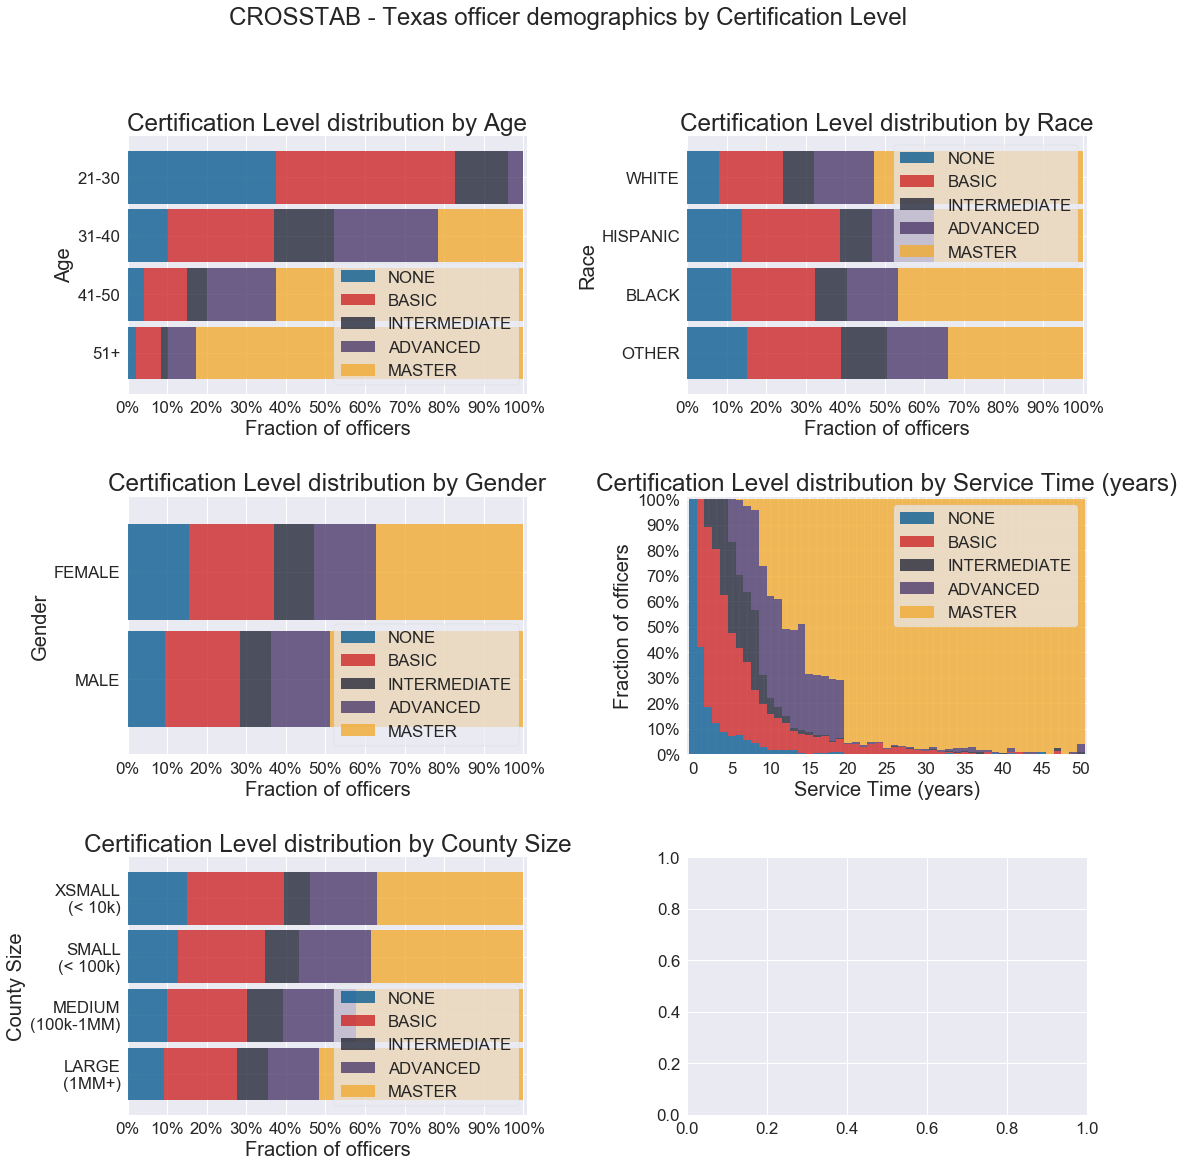

In [9]:
for by in [None] + plot_order:
    if by == 'service_years_int_capped':
        continue
    make_grid_plot(by)

## [ Demographic trends among officer cohorts ]

Saving plot to ../plots/officer_population_gender_and_join_year.png


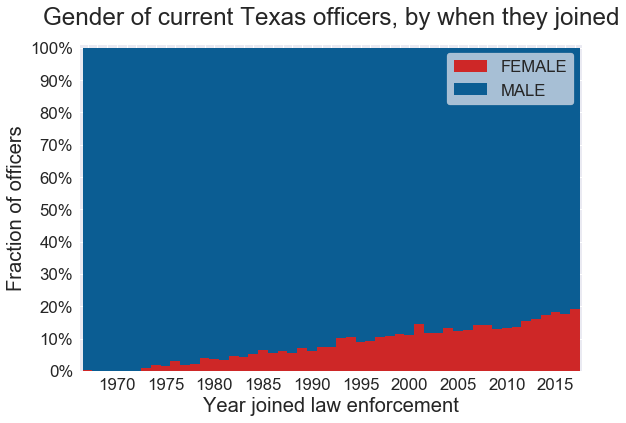

In [10]:
officer_info['began_service_year'] = 2017 - officer_info['service_years_int_capped']
vc = officer_info.groupby(['began_service_year', 'gender']).size().unstack()
vc = vc.div(vc.sum(axis=1), axis=0)
vc = vc[order['gender']]

fig, ax = plt.subplots(1)
vc.plot(kind='bar', ax=ax, width=1, stacked=True, color=[TJI_RED, TJI_BLUE])
ax.set_ylim(0, 1.01)
ax.set_yticks(np.arange(0, 1.01, .1))
ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                    for t in ax.get_xticklabels()], rotation=0)
ax.set_ylabel("Fraction of officers")
ax.set_xlabel('Year joined law enforcement')
ax.set_title('Gender of current Texas officers, by when they joined', pad=20)
ax.legend(title='')
percentify_y(ax, decimals=0)
plotsaver.saveplot(fig, 'gender_and_join_year', dpi=300)

Saving plot to ../plots/officer_population_race_and_join_year.png


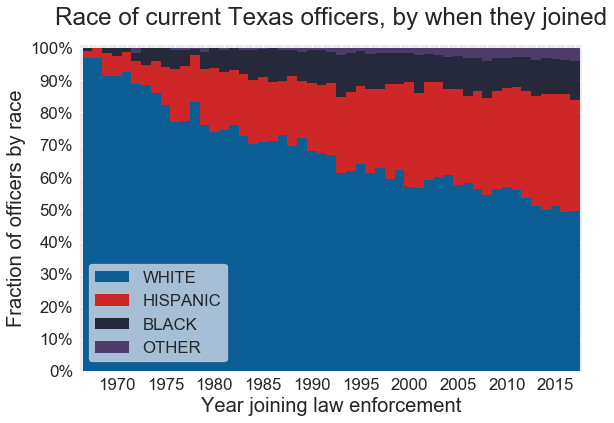

In [11]:
vc = officer_info.groupby(['began_service_year', 'race']).size().unstack()
vc = vc.div(vc.sum(axis=1), axis=0)
vc = vc[order['race']]

fig, ax = plt.subplots(1)
vc.plot(kind='bar', ax=ax, width=1, stacked=True)#, color=[TJI_DEEPBLUE, TJI_RED, TJI_PURPLE, TJI_BLUE])
ax.set_ylim(0, 1.01)
ax.set_yticks(np.arange(0, 1.01, .1))
ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                    for t in ax.get_xticklabels()], rotation=0)
ax.set_ylabel("Fraction of officers by race")
ax.set_xlabel('Year joining law enforcement')
ax.legend(title='', loc='lower right')
ax.set_title('Race of current Texas officers, by when they joined', pad=20)
percentify_y(ax, decimals=0)
ax.legend(loc='lower left')
plotsaver.saveplot(fig, 'race_and_join_year', dpi=300)